<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Stacking For Classification with Python***

$ \ $

Stacking takes several classification models called base learners and uses their output as the input for the meta-classifier.

$ \ $

---


## ***Objectives***

After completing this lab you will be able to:

*   **Understand** what Stacking is and how it works.

*   **Understand**  that Random Forests have less Correlation  between predictors in their ensemble, improving accuracy.


*   **Apply** Stacking.

*   **Understand** Hyperparameters selection in  Stacking.

$ \ $

----

## ***Remark (stacking)***

$ \ $

Consider the figure below the base learners $h_{1}(x)$, $h_{2}(x)$, $h_{3}(x)$, and $h_{4}(x)$ has the output $\hat{y}_{1}$, $\hat{y}_{2}$, $\hat{y}_{3}$, $\hat{y}_{4}$. These are used as an input to the meta classifier $H( \hat{y}_{1}, \hat{y}_{2}, \hat{y}_{3}, \hat{y}_{4})$, makes the final prediction $\hat{y}=H( \hat{y}_{1}, \hat{y}_{2}, \hat{y}_{3}, \hat{y}_{4})$.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/module5_Ensemble_Based_Methods/Screen_Shot_2022-01-12_at_9.40.33_PM.png" width="1000" alt="cognitiveclass.ai logo">
</center>
<center>Fig. 1 Stacking takes several classification models called base learners and uses their output as the input for the meta-classifier. </center>


$ \ $

We can train all the models using all the data but this causes over-fitting. To get a better idea of how the algorithm works we use $\color{yellow}{\text{K-fold Cross-validation}}$. 

$ \ $

We use $K-1$ folds to train the base classifiers and the last fold to train the meta classifier. We repeat the process using different combinations of each fold. This is shown in Fig 2 where:

* The color-coded square represents the different runs and folds. 

* Each row represents a different run of $K$ fold cross-validation, each column is one of $K$ folds where $K=3$. 


* For each column, we use the same color columns to train the classifiers and the different color is used to train the meta classifier.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/module5_Ensemble_Based_Methods/stacking-kfold.png" width="1000" alt="cognitiveclass.ai logo">
</center>
<center>Fig. 2  K-fold Cross-validation to train Stacking classifier. </center>


$ \ $

-----

## ***Table of contents***

$(1)$ Apply Staking Using Wine Data.

$(2)$ Practice.

$(3)$ Cancer Data Example.


$ \ $ 

----

## ***Required libraries***

$ \ $ 

$(1)$ Let's install and import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

$ \ $ 

$(2)$ Ignore error warnings.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

$(3)$ This function will calculate the accuracy of the training and testing data given a model.


In [ ]:
def get_accuracy(X_train, X_test, y_train, y_test, model):

  # calculamos la precision del modelo en la data de prueba
  accuracy_test = metrics.accuracy_score(y_test, model.predict(X_test))

  # calculamos la precision del modelo en la data de entrenamiento
  accuracy_train = metrics.accuracy_score(y_train, model.predict(X_train))

  # la funcion devuelve un diccionario mostrando la precision del modelo sobre la data de entrenamiento y la data de prueba
  return  {"test Accuracy": accuracy_test, "train Accuracy": accuracy_train}

$ \ $

---

## ***Apply   Staking Using   Wine Data***

$ \ $

The class is an essential factor in determining the quality of the wine; this dataset uses chemical analysis of wines grown in the same region in Italy from three different cultivars. Your task is to determine the class  of the wine using the features from the chemical analysis.

$ \ $

$(1)$ Let's load the dataset.


In [ ]:
names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alcalinity of ash' ,'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/wine.data", names = names)

df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


For more info about this dataset visit the following link <a href="https://archive.ics.uci.edu/ml/datasets/wine?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01">here </a>.

$ \ $

$(2)$ We see all the dataset is comprised of numerical values using the method <code>dtypes</code>.


In [ ]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

$ \ $

$(3)$ The column <code>class</code> has the class of the wine, we can use the method <code>unique()</code> to obtain the classes.


In [ ]:
df['Class'].unique()

array([1, 2, 3])

$ \ $

$(4)$ We can examine the correlation between each feature and the class variable. By examining the first row or column we see the features are correlated with the class variable.

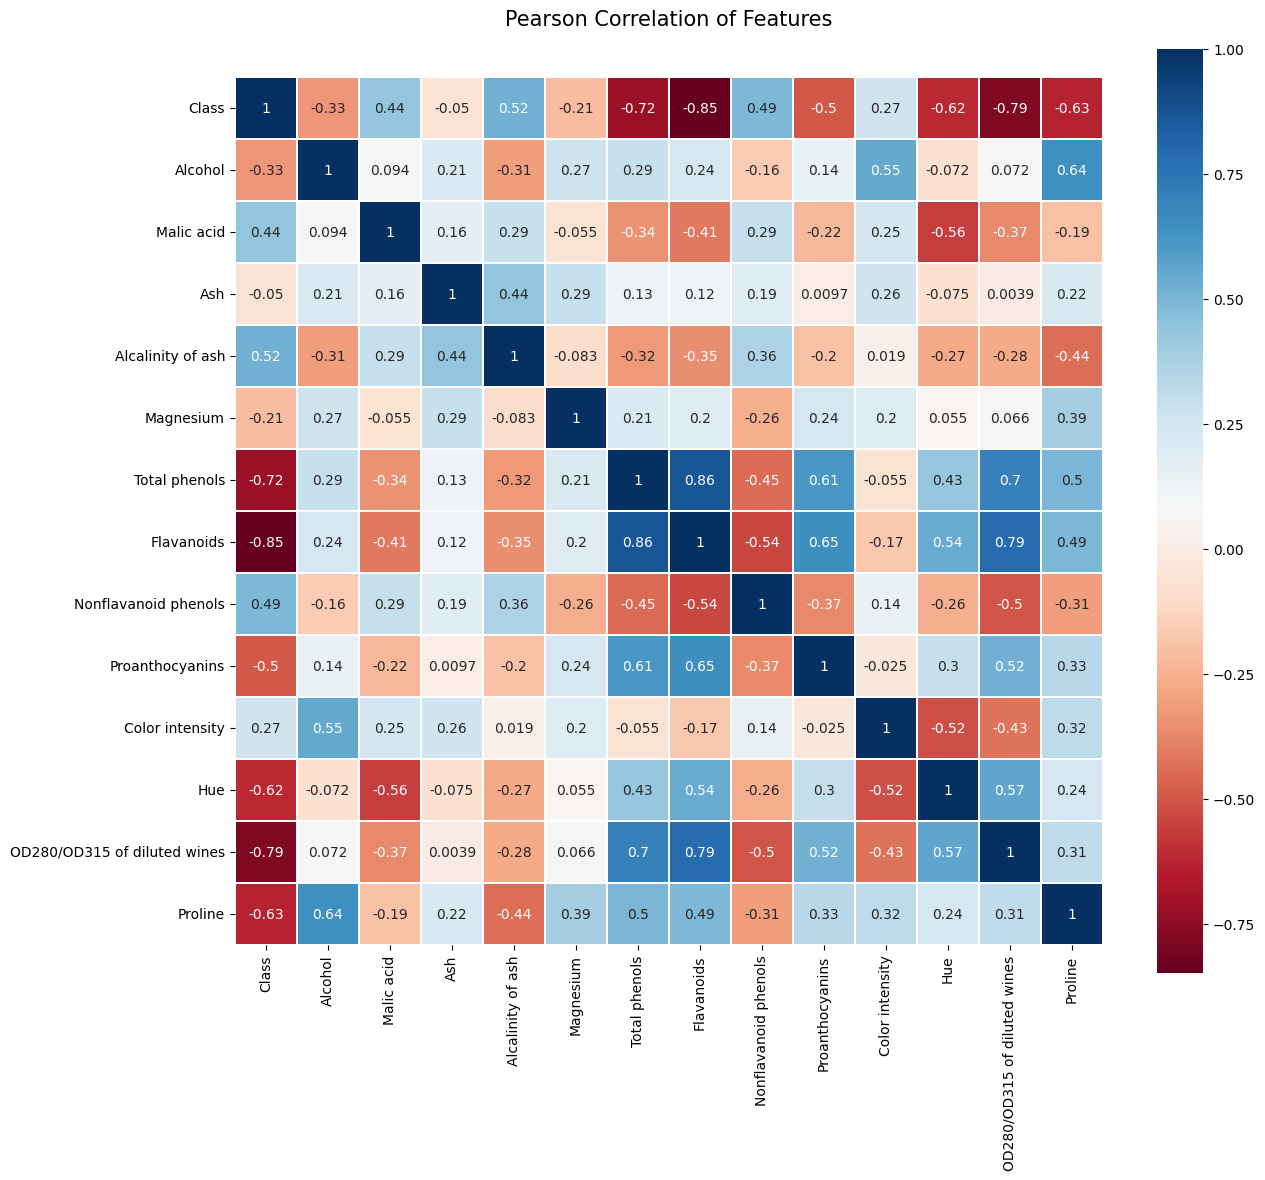

In [ ]:
# plt.cm.RdBu denota un mapeo de colores
colormap = plt.cm.RdBu

# creamos una imagen de tamaño 14x12
plt.figure(figsize = (14, 12))

# describimos el titulo y su correspondiente tamaño
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)

# describimos la correlacion del dataframe df y luego creamos un mapa de calor que muestre la correlacion
corr = df.astype(float).corr()
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

# mostramos el plot en pantalla
plt.show()

$ \ $

$(5)$ We can also examine the <code>Pairplot</code> between pairs of features and the histogram; color-coded to each class. We see the separation between different classes:


In [ ]:
sns.pairplot(df, hue = "Class", diag_kws = {'bw': 0.2})

Output hidden; open in https://colab.research.google.com to view.

$ \ $

-----

## ***Data Pre-Processing and Selection***

$ \ $

$(1)$ Let’s examine the feature list.

In [ ]:
features = list(df.columns)
features

['Class',
 'Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

$ \ $

$(2)$ We assign the class variables to <code>y</code> and feature variables to <code>X</code>.


In [ ]:
y = df[features[0]]
X = df[features[1:]]

$ \ $

$(3)$ We standardize the data.

In [ ]:
# creamos un modelo de escala estandar
obj = preprocessing.StandardScaler()

# entrenamos nuestro modelo con la data X
obj.fit(X)

# escalamos la data X con nuestro modelo entrenado 
X = obj.transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

$ \ $

$(4)$ We can check if the data is standardized by checking the mean and standard deviation, which are approximately zero.

In [ ]:
X.mean(axis = 0)

array([0.00000000e+00, 1.19754394e-16, 1.24744160e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.97953281e-18, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
X.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In Random Forest, we would use these data subsets to train each node of a tree.

$ \ $

-----

## ***Train/Test dataset***

$ \ $

$(1)$ We split our dataset into train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print('Train set', X_train.shape,  y_train.shape)
print('Test set', X_test.shape,  y_test.shape)

Train set (124, 13) (124,)
Test set (54, 13) (54,)


$ \ $

$\color{aquamarine}{\text{Stacking}}$ consists of creating a Stacking Classifier object, but first, you require a

$$\text{Dictionary of estimators (individual model objects or base learners).}$$

The key of the dictionary is a name that is up to you, we use the usual acronym for the model. The value is the model object in this case is:

* ***SVC*** for Support Vector Classifier, 

* ***dt*** for Decision Tree Classifier 

* ***KNN*** for K Neighbors Classifier.

$ \ $

$(2)$ We create a dictionary of estimators.


In [ ]:
estimators = [('SVM', SVC(random_state = 42)), ('KNN', KNeighborsClassifier()), ('dt', DecisionTreeClassifier())]
estimators 

[('SVM', SVC(random_state=42)),
 ('KNN', KNeighborsClassifier()),
 ('dt', DecisionTreeClassifier())]

$ \ $

$(3)$ To train the final model we create a $\color{aquamarine}{\text{Stacking Classifier}}$, this combines the base estimators using the meta estimator. The meta-classifier is determined by the parameter:

 $$\text{ final_estimator}$$
 
in this case we use Logistic Regression and also input the base classifiers using:

$$\text{the estimators parameter}$$

and finally, we fit the model.


In [ ]:
# creamos un Stacking Classifier con los estimadores anteriores y como meta clasificador usamos regresion logistica
clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

# entrenamos el modelo con la data de entrenamiento
clf.fit(X_train, y_train)

# mostramos los resultados en pantalla
clf

StackingClassifier(estimators=[('SVM', SVC(random_state=42)),
                               ('KNN', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

$ \ $

$(4)$ We can make a prediction.

In [ ]:
y_hat = clf.predict(X_test)
y_hat

array([3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1,
       1, 1, 2, 1, 1, 1, 2, 3, 3, 1])

$ \ $ 

$(5)$ We can obtain the training and testing accuracy, we see that the model performs well.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, clf)

{'test Accuracy': 0.9814814814814815, 'train Accuracy': 1.0}

***Note:*** Like most complex models Stacking is prone to overfitting.

$ \ $

----

## ***Practice***

$ \ $

Create a Stacking Classifier object as before but exchange the Decision Tree Classifier with the SVM classifier. Calculate the accuracy on the training and testing data.

In [ ]:
# creamos un diccionario de estimadores
estimators = [('SVM', SVC(random_state = 42)), ('KNN', KNeighborsClassifier()), ('lr', LogisticRegression())]

# creamos un Stacking Classifier con los estimadores anteriores y como meta clasificador usamos DecisionTreeClassifier()
clf = StackingClassifier(estimators = estimators, final_estimator = DecisionTreeClassifier())

# entrenamos nuestro modelo con la data de entrenamiento
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('SVM', SVC(random_state=42)),
                               ('KNN', KNeighborsClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=DecisionTreeClassifier())

In [ ]:
# describimos la precision del modelo anterior
get_accuracy(X_train, X_test, y_train, y_test, clf)

{'test Accuracy': 0.9814814814814815, 'train Accuracy': 1.0}

$ \ $

-----

## ***GridSearchCV and Stacking Classifiers***

$ \ $

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications:

* Drug A, 

* Drug B, 

* Drug C,

* Drug x,

* Drug y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The $\color{yellow}{\text{features}}$ of this dataset are:

* Age, 

* Sex, 

* Blood Pressure, 

* the Cholesterol of the patients,

and the $\color{orange}{\text{target}}$ is 

* the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to:

* build a decision tree,

* predict the class of a unknown patient, or to prescribe a drug to a new patient. 

You will use GridSearchCV and Stacking Classifiers  to find the best results.

$ \ $

$(1)$ Let's load the dataset.

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


$ \ $

$(2)$ Let's create the $X$ and $y$ for our dataset.


In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df["Drug"]

$ \ $

$(3)$ Now lets use a <code>LabelEncoder</code> to turn categorical features into numerical.


In [ ]:
# creamos un codificador de etiquetas para transformar los datos de la columna 1 de X, en datos numericos
le_sex = preprocessing.LabelEncoder()

# entrenamos nuestro modelo con los valores de la columna 1 de X
le_sex.fit(['F','M'])

# transformamos los datos de la columna 1 de X en datos numericos con el modelo codificador de etiquetas creado anteriormente
X[:, 1] = le_sex.transform(X[:, 1]) 

In [ ]:
# creamos un codificador de etiquetas para transformar los datos de la columna 2 de X, en datos numericos
le_BP = preprocessing.LabelEncoder()

# entrenamos nuestro modelo con los valores de la columna 2 de X
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])

# transformamos los datos de la columna 2 de X en datos numericos con el modelo codificador de etiquetas creado anteriormente
X[:,2] = le_BP.transform(X[:,2])

In [ ]:
# creamos un codificador de etiquetas para transformar los datos de la columna 3 de X, en datos numericos
le_Chol = preprocessing.LabelEncoder()

# entrenamos nuestro modelo con los valores de la columna 3 de X
le_Chol.fit(['NORMAL', 'HIGH'])

# transformamos los datos de la columna 3 de X en datos numericos con el modelo codificador de etiquetas creado anteriormente
X[:, 3] = le_Chol.transform(X[:, 3]) 

In [ ]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

$ \ $

$(4)$ We scale our data.

In [ ]:
# creamos un modelo escalador
scaler = preprocessing.StandardScaler()

# entrenamos nuestro modelo escalador con la data X
scaler.fit(X)

# tranformamos la data X en una data numerica usando el modelo escalador
X = scaler.transform(X)

$ \ $

$(5)$ Split the data into training and testing data with a $80/20$ split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (140, 5) (140,)
Test set: (60, 5) (60,)


$ \ $

$(6)$ We have our dictionary of estimators, the individual model objects or base learners.

In [ ]:
estimators = [('SVM', SVC(random_state = 42)), ('knn', KNeighborsClassifier()), ('dt', DecisionTreeClassifier())]
estimators

[('SVM', SVC(random_state=42)),
 ('knn', KNeighborsClassifier()),
 ('dt', DecisionTreeClassifier())]

$ \ $

$(7)$ We create a Stacking Classifier.

In [ ]:
clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
clf 

StackingClassifier(estimators=[('SVM', SVC(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

$ \ $ 

$(8)$ In order to alter the base models in the dictionary of hyperparameter values, we add the key value of each model followed by the parameter of the model we would like to vary.

In [ ]:
param_grid = {'dt__max_depth': [n for n in range(10)],
              'dt__random_state': [0], 
              'SVM__C': [0.01, 0.1, 1], 
              'SVM__kernel': ['linear', 'poly', 'rbf'],
              'knn__n_neighbors': [1, 4, 8, 9]}

$ \ $

$(9)$ We use <code>GridSearchCV</code> to search over specified parameter values of the model.


In [ ]:
# creamos un objeto GridSearchCV con el modelo clf anterior y los parametros establecidos previamente
search = GridSearchCV(estimator = clf, param_grid = param_grid, scoring = 'accuracy')

# entrenamos nuestro modelo con la data de entrenamiento
search.fit(X_train, y_train)

GridSearchCV(estimator=StackingClassifier(estimators=[('SVM',
                                                       SVC(random_state=42)),
                                                      ('knn',
                                                       KNeighborsClassifier()),
                                                      ('dt',
                                                       DecisionTreeClassifier())],
                                          final_estimator=LogisticRegression()),
             param_grid={'SVM__C': [0.01, 0.1, 1],
                         'SVM__kernel': ['linear', 'poly', 'rbf'],
                         'dt__max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'dt__random_state': [0],
                         'knn__n_neighbors': [1, 4, 8, 9]},
             scoring='accuracy')

$ \ $

$(10)$ We can find the accuracy of the best model.

In [ ]:
search.best_score_

1.0

$ \ $

$(11)$ We can find the accuracy test data.

In [ ]:
get_accuracy(X_train, X_test, y_train, y_test, search)

{'test Accuracy': 0.9666666666666667, 'train Accuracy': 1.0}